# 1. 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

pd.set_option('max.columns', 1000)

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.rcParams['font.family'] = 'AppleGothic'
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings(action = 'ignore')

from sklearn.ensemble import RandomForestRegressor

# 2. 데이터 불러오기

In [3]:
# 데이터 확인
raw_data = pd.read_csv('C:/Users/lg/캐글데이터분석/House Prices/train.csv')

print('Shape of Data :', raw_data.shape, '\n')
print('-' * 50)
print(raw_data.info())

Shape of Data : (1460, 81) 

--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1

# 3. 결측치 처리

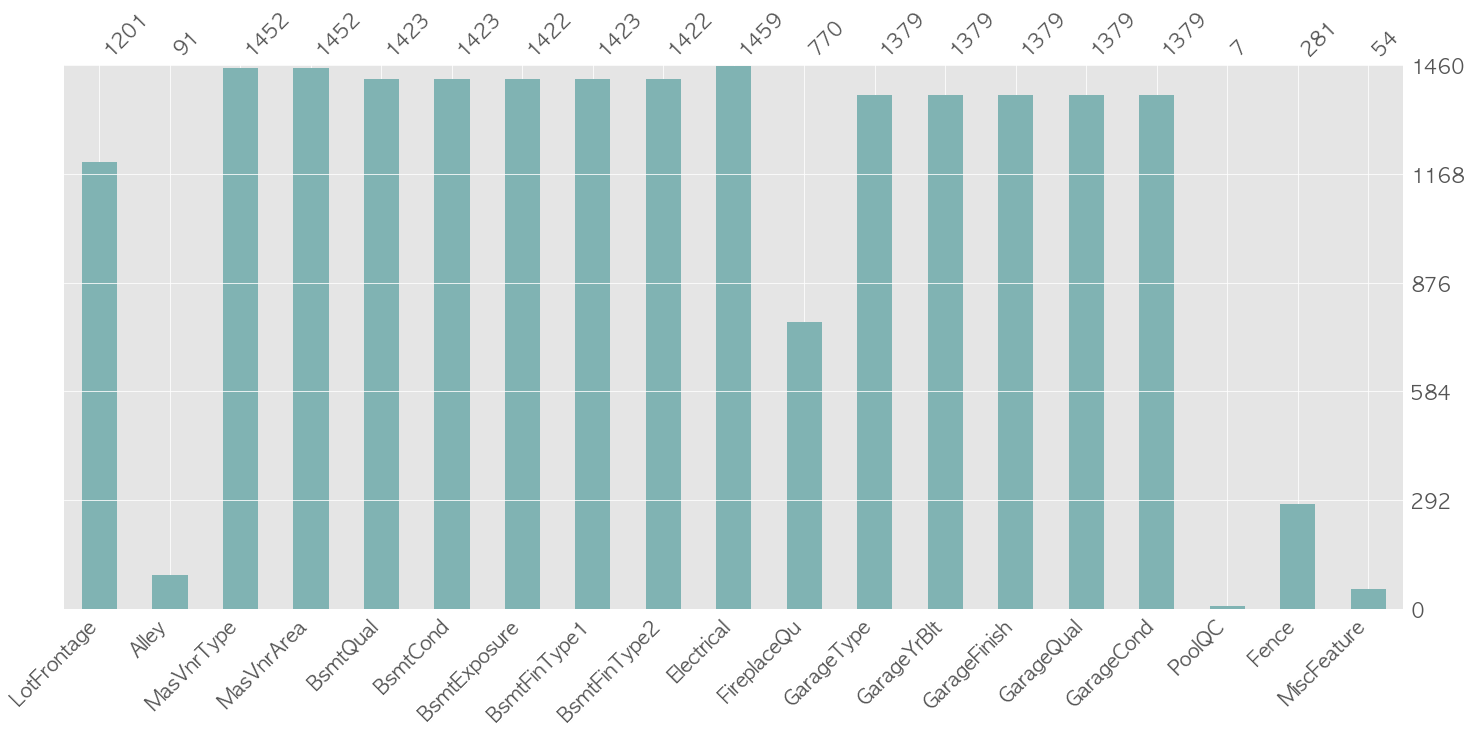

In [3]:
# 결측치를 포함하고 있는 features 추출
null_data = pd.DataFrame(raw_data.isnull().sum(), columns = ['Count'])
null_list = null_data[null_data['Count'] > 0].index

# 추출 후 시각화
msno.bar(raw_data[null_list], color = (0.5, 0.7, 0.7), fontsize = 20)
plt.yticks([])
plt.show()

In [4]:
object_list = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
               'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
               'PoolQC', 'Fence', 'MiscFeature']

# 원래 데이터를 보존하기 위해 새로운 DataFrame 생성
modify_data = raw_data.copy()

# 결측치를 의미하지 않는 값에 'No have' 채워넣기
for feature in object_list:
    null_data = modify_data[feature].isnull().sum()
    print('Number of null values of {} *Before Modify* :'.format(feature), null_data, '\n')
    
    modify_data.loc[modify_data[feature].isnull(), feature] = 'No have'
    
    null_data = modify_data[feature].isnull().sum()
    print('Number of null values of {} *After Modify* :'.format(feature), null_data)
    print('-' * 60)

Number of null values of Alley *Before Modify* : 1369 

Number of null values of Alley *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtQual *Before Modify* : 37 

Number of null values of BsmtQual *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtCond *Before Modify* : 37 

Number of null values of BsmtCond *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtExposure *Before Modify* : 38 

Number of null values of BsmtExposure *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtFinType1 *Before Modify* : 37 

Number of null values of BsmtFinType1 *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtFinType2 *Before Modify* : 38 

Number of null values of BsmtFinType2 *After Modify* : 0
---------------

In [5]:
print('Number of null values of GarageYrBlt *Before Modify* :', modify_data['GarageYrBlt'].isnull().sum(), '\n')

# 결측치 대체
modify_data.loc[modify_data['GarageYrBlt'].isnull(), 'GarageYrBlt'] = 9999
print('Number of null values of GarageYrBlt *After Modify* :', modify_data['GarageYrBlt'].isnull().sum())

Number of null values of GarageYrBlt *Before Modify* : 81 

Number of null values of GarageYrBlt *After Modify* : 0


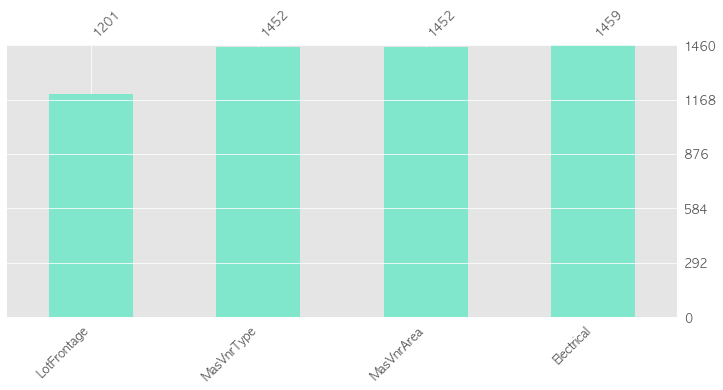

In [6]:
# 변경해준 뒤 결측치 확인
null_data = pd.DataFrame(modify_data.isnull().sum(), columns = ['Count'])
null_list = null_data[null_data['Count'] > 0].index

# 추출 후 시각화
msno.bar(modify_data[null_list], color = (0.5, 0.9, 0.8), fontsize = 12, figsize = (12, 5))
plt.yticks([])
plt.show()

- **MasVnrType**의 값이 결측치일 때, **MasVnrArea**의 값 역시 결측치임을 확인할 수 있다.


- 결측치의 개수가 8개 뿐이므로 **MasVnrType** 변수에는 **'None'**의 값을, **MasVnrArea** 변수에는 **'0'**의 값을 넣어주자.


- **Electrical** 변수의 경우 1개의 결측치가 있으며, 최빈값으로 대체해주도록 하자.

In [7]:
print('Number of null values of MasVnrType *Before* :', modify_data['MasVnrType'].isnull().sum(), '\n')
print('Number of null values of MasVnrArea *Before* :', modify_data['MasVnrArea'].isnull().sum(), '\n')
print('Number of null values of Electrical *Before* :', modify_data['Electrical'].isnull().sum(), '\n')

modify_data['MasVnrType'].fillna('None', inplace = True)
modify_data['MasVnrArea'].fillna(0, inplace = True)
modify_data['Electrical'].fillna(modify_data['Electrical'].mode()[0], inplace = True)

print('Number of null values of MasVnrType *After* :', modify_data['MasVnrType'].isnull().sum(), '\n')
print('Number of null values of MasVnrArea *After* :', modify_data['MasVnrArea'].isnull().sum(), '\n')
print('Number of null values of Electrical *After* :', modify_data['Electrical'].isnull().sum())

Number of null values of MasVnrType *Before* : 8 

Number of null values of MasVnrArea *Before* : 8 

Number of null values of Electrical *Before* : 1 

Number of null values of MasVnrType *After* : 0 

Number of null values of MasVnrArea *After* : 0 

Number of null values of Electrical *After* : 0


- **LotFrontage** 변수의 결측치를 **LotArea** 변수를 로그화한 후, **KNN** 모델을 사용하여 결측치를 대체해주도록 하자.

In [8]:
# 'LotFrontage' 결측치를 대체해주는 함수 만들기
def imputer_lotfrontage(raw_data):
    
    print('Number of null values of LotFrontage *Before Modify* :', raw_data['LotFrontage'].isnull().sum(), '\n')
    
    # 'KNNImputer' 라이브러리 불러오기
    from sklearn.impute import KNNImputer
    
    # 'LotFrontage' 변수에 결측치를 가지는 'Id' 추출 후 저장
    miss_id = raw_data[raw_data['LotFrontage'].isnull()]['Id'].unique()
    
    # 'Id', 'LotFrontage', 'LotArea' 변수 추출 후 저장
    data = raw_data[['Id', 'LotFrontage', 'LotArea']]
    
    # 'LotFrontage' 변수의 값이 300 넘는 관측치를 삭제하기로 했으므로 삭제
    outlier_id = data[data['LotFrontage'] > 300]['Id']
    data = data[~data['Id'].isin(outlier_id)]
    
    # 'Id' 변수를 인덱스로 지정
    data = data.set_index('Id')
    
    # 'LotArea' 변수를 로그화 수행 후, 변수 삭제
    data['LotLogArea'] = data['LotArea'].apply(lambda x: np.log(x))
    data = data.drop('LotArea', axis = 1)
    
    # 모델 객체 생성 후 학습시키고 DataFrame으로 저장
    # 원본 데이터에 결측치로 기입되어 있는 관측치들만 수정해주기 위해 DataFrame을 만들 때, 인덱스를 위 데이터의 인덱스로 지정
    imputer = KNNImputer(n_neighbors = 5)
    pre_data = pd.DataFrame(imputer.fit_transform(data), columns = data.columns, index = data.index)
    
    # 결측치가 존재하던 관측치만 저장
    pre_data = pre_data[pre_data.index.isin(miss_id)]
    
    # 원본 데이터 결측치를 대입해주는 과정
    for id_value, lot_value in zip(pre_data.index, pre_data['LotFrontage']):
        for index in raw_data.index:
            
            if raw_data.loc[index, 'Id'] == id_value:
                raw_data.loc[index, 'LotFrontage'] = lot_value
    
    print('Number of null values of LotFrontage *After Modify* :', raw_data['LotFrontage'].isnull().sum())
 
    return raw_data

In [13]:
# 생성한 함수 적용
modify_data = imputer_lotfrontage(modify_data)

Number of null values of LotFrontage *Before Modify* : 259 

Number of null values of LotFrontage *After Modify* : 0


- **imputer_lotfrontage** 변수를 사용하여 모든 결측치를 처리해주었다.

----

- 순서형 변수 중 문자열 Type을 가지고 있는 변수를 변환해주도록 하자.

In [26]:
# 우선 원래 데이터를 보존하기 위해 데이터 복사
final_data = modify_data.copy()

# 'ExterQual' & 'ExterCond'
mapping = {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1}

final_data['ExterQual'] = final_data['ExterQual'].map(mapping)
final_data['ExterCond'] = final_data['ExterCond'].map(mapping)

# 'BsmtQual' & 'BsmtCond'
mapping = {'No have' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}

final_data['BsmtQual'] = final_data['BsmtQual'].map(mapping)
final_data['BsmtCond'] = final_data['BsmtCond'].map(mapping)

# 'HeatingQC'
mapping = {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}

final_data['HeatingQC'] = final_data['HeatingQC'].map(mapping)

# 'KitchenQual'
mapping = {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}

final_data['KitchenQual'] = final_data['KitchenQual'].map(mapping)

# 'FireplaceQu'
mapping = mapping = {'No have' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}

final_data['FireplaceQu'] = final_data['FireplaceQu'].map(mapping)

# 'GarageQual' & 'GarageCond'
mapping = mapping = {'No have' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}

final_data['GarageQual'] = final_data['GarageQual'].map(mapping)
final_data['GarageCond'] = final_data['GarageCond'].map(mapping)

# 'PoolQC'
mapping = mapping = {'No have' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4}

final_data['PoolQC'] = final_data['PoolQC'].map(mapping)

In [75]:
# 명목형 변수와 'SalePrice' 변수의 Boxplot을 시각화 해주는 함수 생성
def nor_compare_plot(x = None, y = None, data = None):
    
    # 해당 변수의 BarPlot과 해당 변수의 범주에 따른 'SalePrice' BoxPlot을 그려주도록 하자.
    fig, axes = plt.subplots(ncols = 2, figsize = (16, 5))
    
    # BarPlot
    plot_data = pd.DataFrame(data[x].value_counts().sort_index())
    
    sns.barplot(x = plot_data.index, y = x, data = plot_data, ax = axes[0])
    axes[0].set_ylabel('')
    
    for index, [value] in enumerate(plot_data.values):
        axes[0].text(index, value, value, ha = 'center', fontsize = 13)
        
    # BoxPlot
    sns.boxplot(x = x, y = y, data = data, ax = axes[1])
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')
    
    fig.tight_layout()

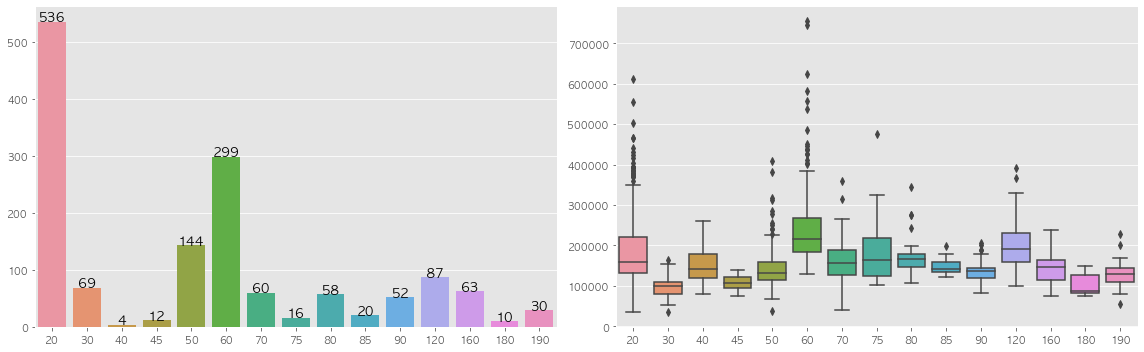

In [76]:
nor_compare_plot(x = 'MSSubClass', y = 'SalePrice', data = final_data)

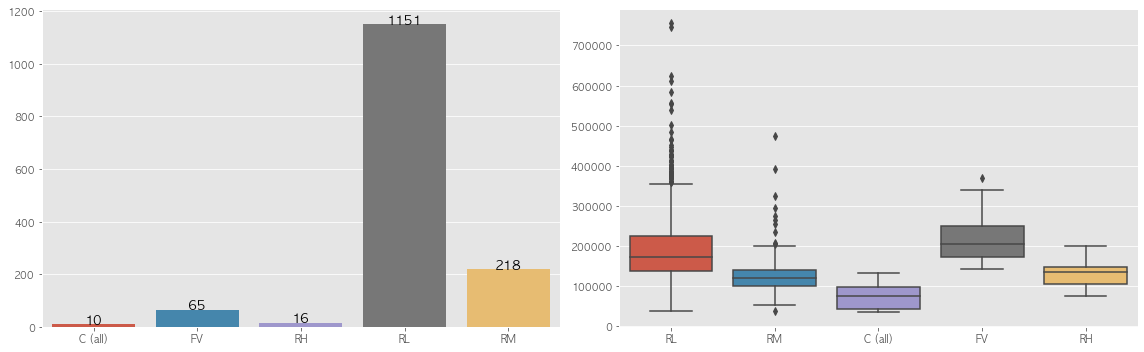

In [77]:
nor_compare_plot(x = 'MSZoning', y = 'SalePrice', data = final_data)

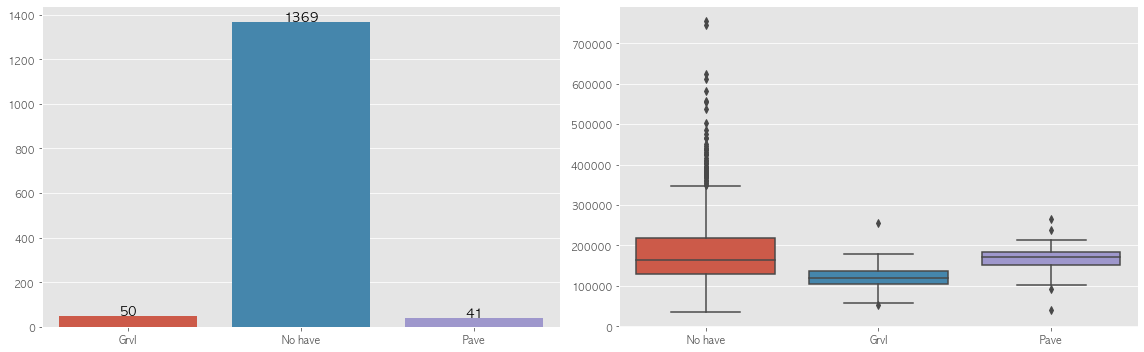

In [78]:
nor_compare_plot(x = 'Alley', y = 'SalePrice', data = final_data)

- 대부분의 관측치에서 건물로 접근하는 골목이 없지만, 골목이 있는 경우 포장된 골목과 비포장 골목에 따라 가격 차이가 있음을 확인할 수 있다.

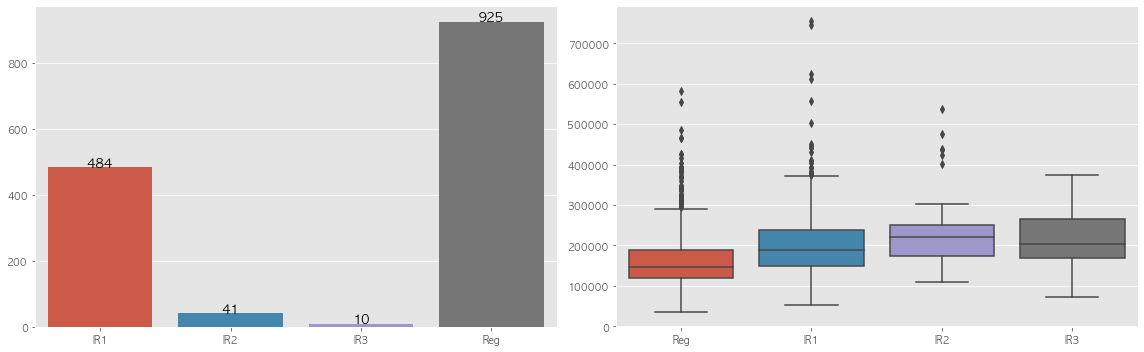

In [82]:
nor_compare_plot(x = 'LotShape', y = 'SalePrice', data = final_data)

- **LotShape** 변수에 총 4개의 범주가 있지만, 시각화를 통해 불규칙한 건물들의 **SalePrice** 분포가 비슷함을 확인할 수 있다.


- 총 4개의 범주를 **규칙**과 **불규칙**을 의미하는 2개의 범주로 줄인 **NewLotShape** 변수를 만들어 확인해보자.

In [83]:
# 'NewLotShape' 변수 생성
print('Shape of final_data *Before Create* :', final_data.shape, '\n')

final_data['NewLotShape'] = np.nan

for index in final_data.index:
    
    value = final_data.loc[index, 'LotShape']
    
    if value == 'Reg':
        final_data.loc[index, 'NewLotShape'] = 'Reg'
        
    else:
        final_data.loc[index, 'NewLotShape'] = 'IR'
        
print('Shape of final_data *After Create* :', final_data.shape, '\n')
print('Unique of values of NewLotShape :', final_data['NewLotShape'].unique())

Shape of final_data *Before Create* : (1460, 82) 

Shape of final_data *After Create* : (1460, 83) 

Unique of values of NewLotShape : ['Reg' 'IR']


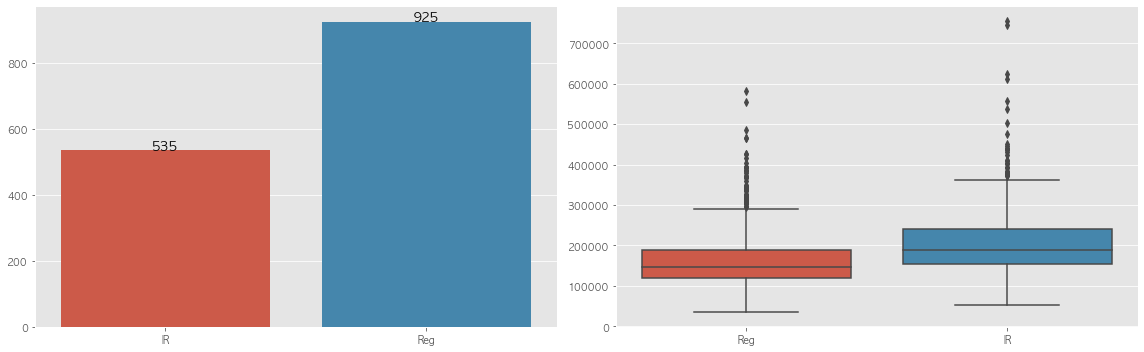

In [84]:
nor_compare_plot(x = 'NewLotShape', y = 'SalePrice', data = final_data)

- 불규칙한 건물의 경우 이상치가 존재하지만, 규칙적인 건물과 불규칙적인 건물에 따라 **SalePrice** 차이가 있음을 확인 할 수 있다.

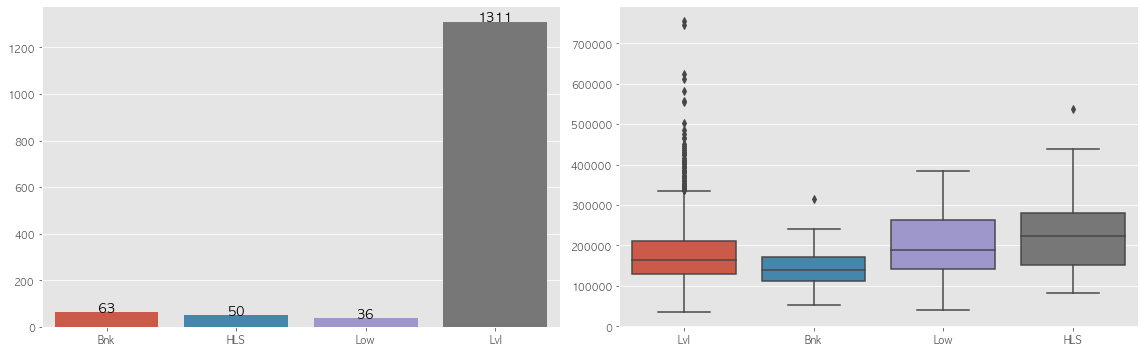

In [85]:
nor_compare_plot(x = 'LandContour', y = 'SalePrice', data = final_data)

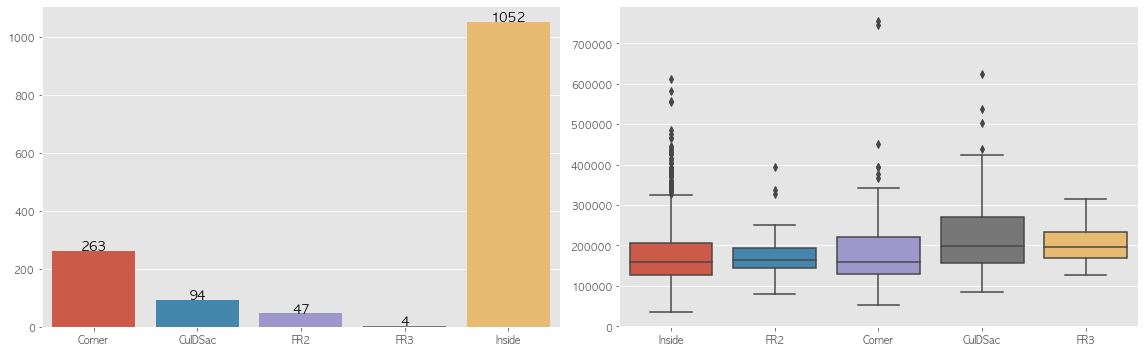

In [86]:
nor_compare_plot(x = 'LotConfig', y = 'SalePrice', data = final_data)

- **LotConfig** 변수의 범주에 따라 **SalePrice** 차이는 크게 없는 것으로 보인다.

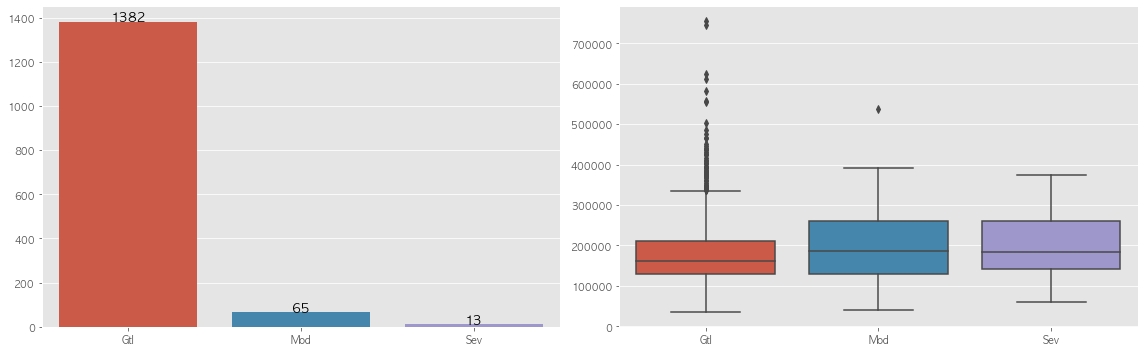

In [89]:
nor_compare_plot(x = 'LandSlope', y = 'SalePrice', data = final_data)

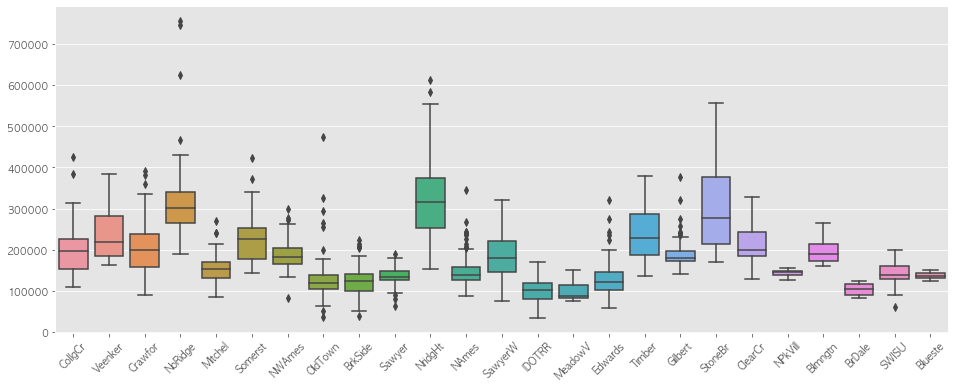

In [97]:
# 'Neighborhood' & 'SalePrice'
plt.figure(figsize = (16, 6))

sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = final_data)
plt.xticks(rotation = 45)
plt.xlabel('')
plt.ylabel('')
plt.show()

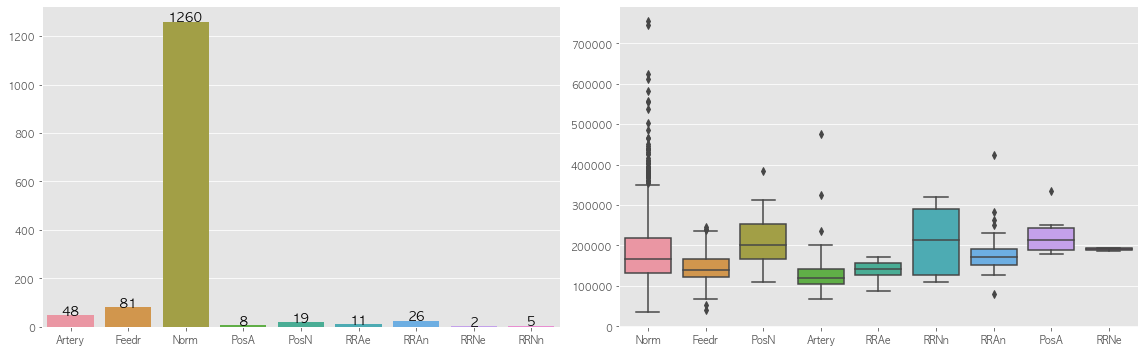

In [100]:
nor_compare_plot(x = 'Condition1', y = 'SalePrice', data = final_data)

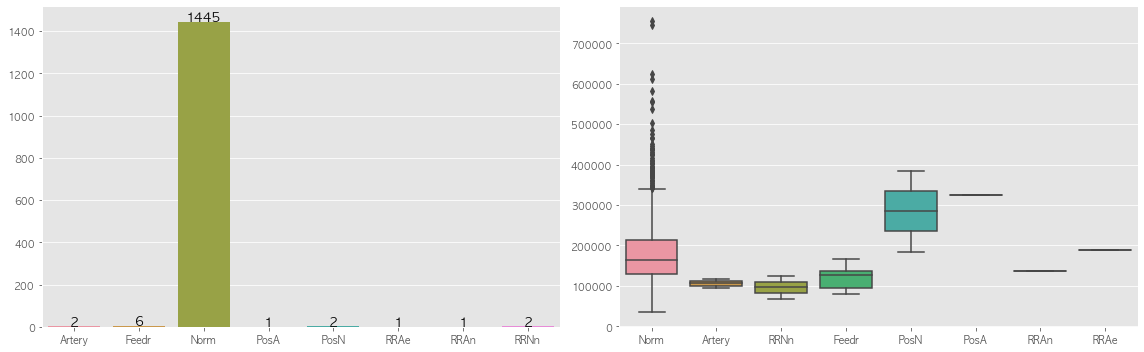

In [101]:
nor_compare_plot(x = 'Condition2', y = 'SalePrice', data = final_data)

- 여러 조건들의 근접성에 따라 **SalePrice**에 차이가 있음을 볼 수 있다.


- 하지만 대부분의 관측치가 **Norm** 범주에 해당함을 확인할 수 있다.


- Condition1변수를 **Norm, Street, Positive, Rail** 4개의 범주로 통합하여 새로운 변수로 만들어주자.


- 또한, Condition1과 Condition2 변수를 함께 사용하여 **조건이 없는 경우**와 **조건이 한 개 이상인 경우**를 나타내는 변수를 만들어주자.

In [106]:
print('Shape of final_data *Before Create* :', final_data.shape, '\n')

# 'NewCondition1' 변수 생성
final_data['NewCondition1'] = np.nan

for index in final_data.index:
    
    value = final_data.loc[index, 'Condition1']
    
    if (value == 'Artery') | (value == 'Feedr'):
        final_data.loc[index, 'NewCondition1'] = 'Street'
        
    elif (value == 'PosN') | (value == 'PosA'):
        final_data.loc[index, 'NewCondition1'] = 'Positive'
        
    elif value == 'Norm':
        final_data.loc[index, 'NewCondition1'] = 'Norm'
        
    else:
        final_data.loc[index, 'NewCondition1'] = 'Rail'
        
print('Unique values of NewCondition1 :', final_data['NewCondition1'].unique(), '\n')

# 'CountCon' 변수 생성
final_data['CountCon'] = np.nan

for index in final_data.index:
    
    first_value = modify_data.loc[index, 'Condition1']
    second_value = modify_data.loc[index, 'Condition2']
    
    # 'Condition1'과 'Condition2' 변수 모두 'Norm'인 경우
    if (first_value == 'Norm') & (second_value == 'Norm'):
        final_data.loc[index, 'CountCon'] = 0
    
    else:
        final_data.loc[index, 'CountCon'] = 1

print('Unique values of CountCon :', final_data['CountCon'].unique(), '\n')
print('Shape of final_data *After Create* :', final_data.shape)

Shape of final_data *Before Create* : (1460, 83) 

Unique values of NewCondition1 : ['Norm' 'Street' 'Positive' 'Rail'] 

Unique values of CountCon : [0. 1.] 

Shape of final_data *After Create* : (1460, 85)


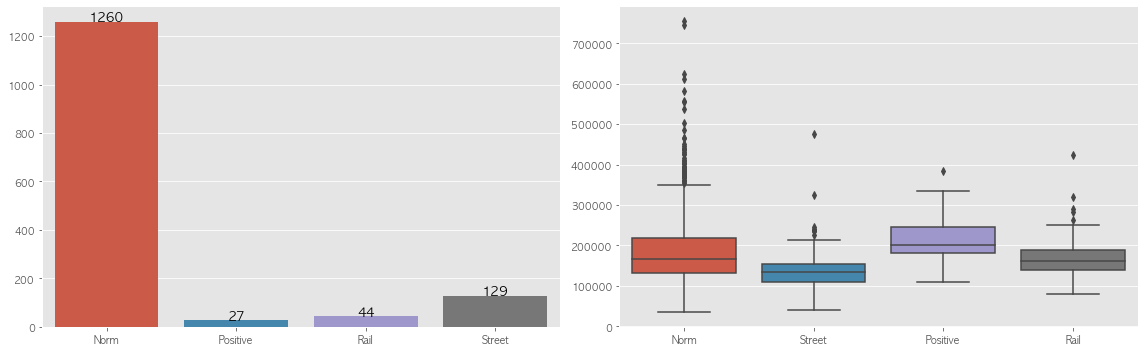

In [107]:
nor_compare_plot(x = 'NewCondition1', y = 'SalePrice', data = final_data)

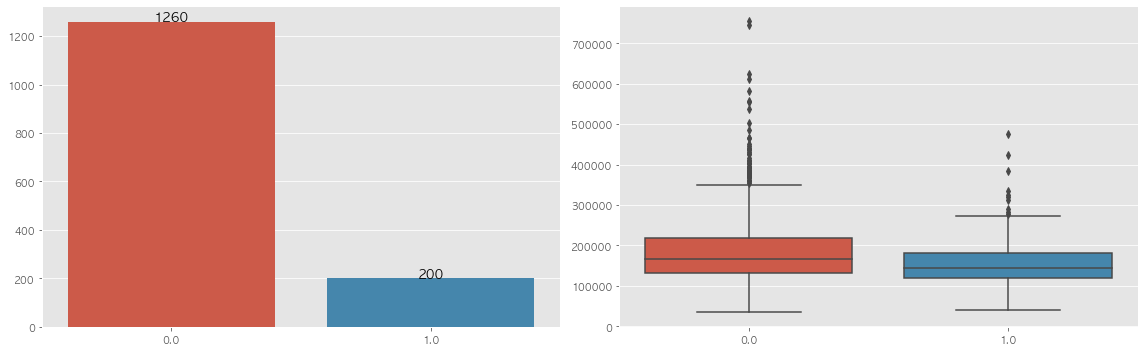

In [108]:
nor_compare_plot(x = 'CountCon', y = 'SalePrice', data = final_data)

- **NewCondition1**과 **CountCon** 변수에 따라 **SalePrice**의 차이가 있음을 확인할 수 있다.


- **NewCondition1**이 **'Street'** 범주에 속할 때, 다른 범주보다 평균이 낮음을 볼 수 있다.


- **Street**의 의미로 보아 도로랑 근접해 있어 소음 발생 우려가 있기 때문에 가격이 낮음을 추측해 볼 수 있다.

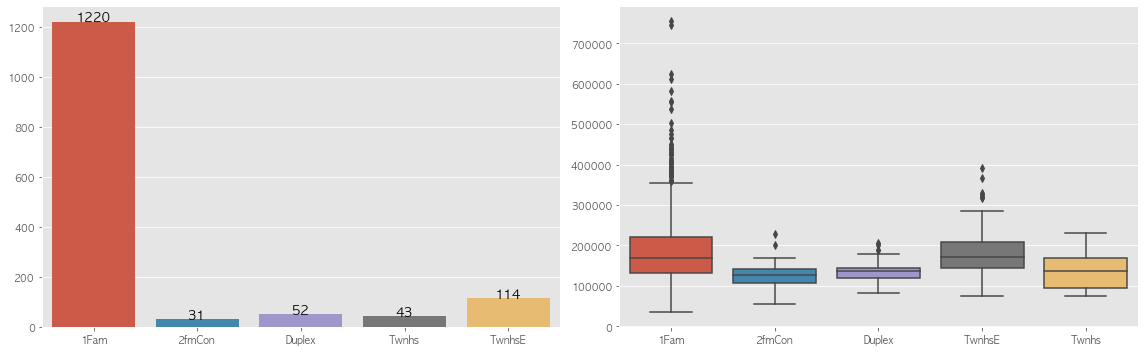

In [109]:
nor_compare_plot(x = 'BldgType', y = 'SalePrice', data = final_data)

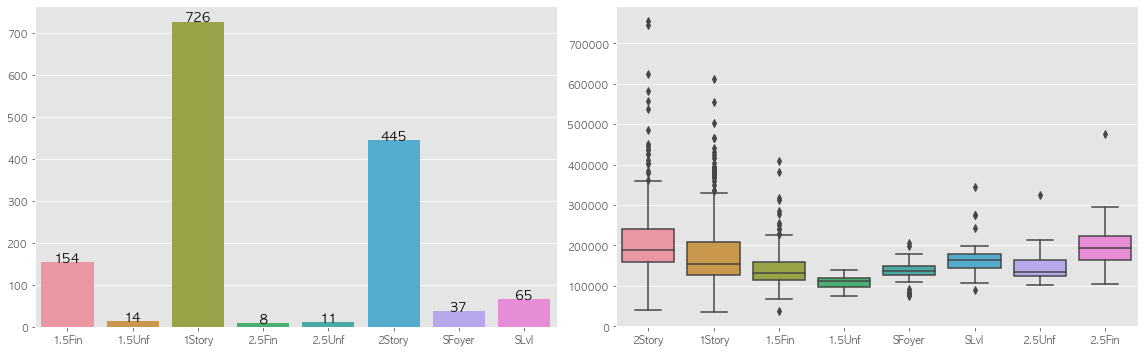

In [113]:
nor_compare_plot(x = 'HouseStyle', y = 'SalePrice', data = final_data)

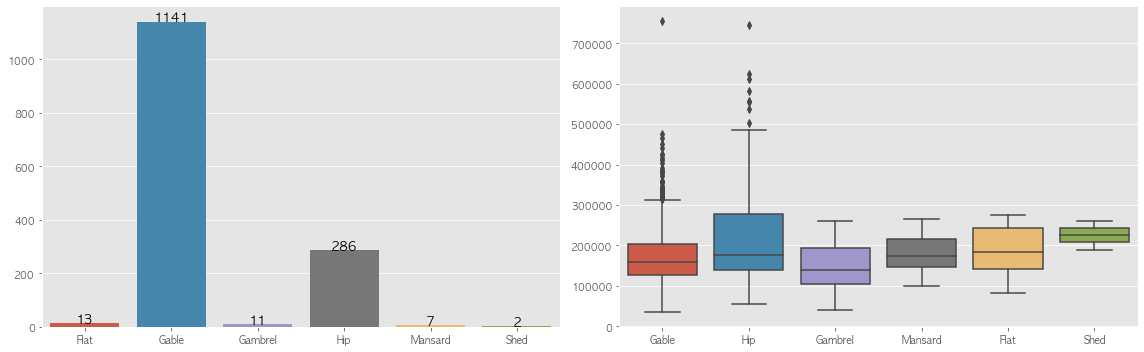

In [114]:
nor_compare_plot(x = 'RoofStyle', y = 'SalePrice', data = final_data)

- **Exterior1st**와 **Exterior2nd** 두 변수의 범주에 한 개의 관측치만 존재하는 범주가 있다.


- 따라서 두 변수를 이용하여 똑같은 재료를 사용했다면 **1**, 그렇지 않으면 **0**을 의미하는 변수를 만들어주자.

In [118]:
# 'SameExterior' 변수 생성
print('Shape of final_data *Before Create* :', final_data.shape, '\n')

final_data['SameExterior'] = np.nan

for index in final_data.index:
    
    first_exterior = final_data.loc[index, 'Exterior1st']
    second_exterior = final_data.loc[index, 'Exterior2nd']
    
    if first_exterior == second_exterior:
        final_data.loc[index, 'SameExterior'] = 1
    
    else:
        final_data.loc[index, 'SameExterior'] = 0
        
print('Shape of final_data *After Create* :', final_data.shape, '\n')
print('Unique vlaues of SameExterior :', final_data['SameExterior'].unique())

Shape of final_data *Before Create* : (1460, 85) 

Shape of final_data *After Create* : (1460, 86) 

Unique vlaues of SameExterior : [1. 0.]


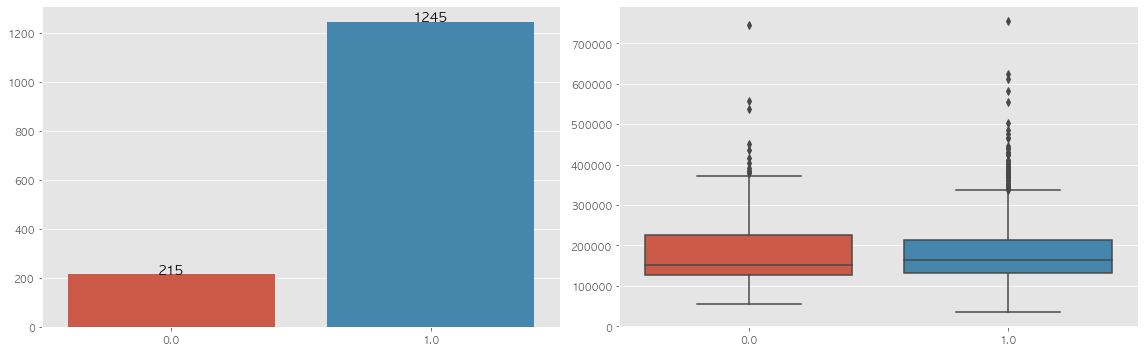

In [119]:
nor_compare_plot(x = 'SameExterior', y = 'SalePrice', data = final_data)

- 건물의 외부 공사를 하는 데 있어서 **똑같은 재료를 사용했는지 여부**에 대해서는 큰 차이가 없음을 확인할 수 있다.

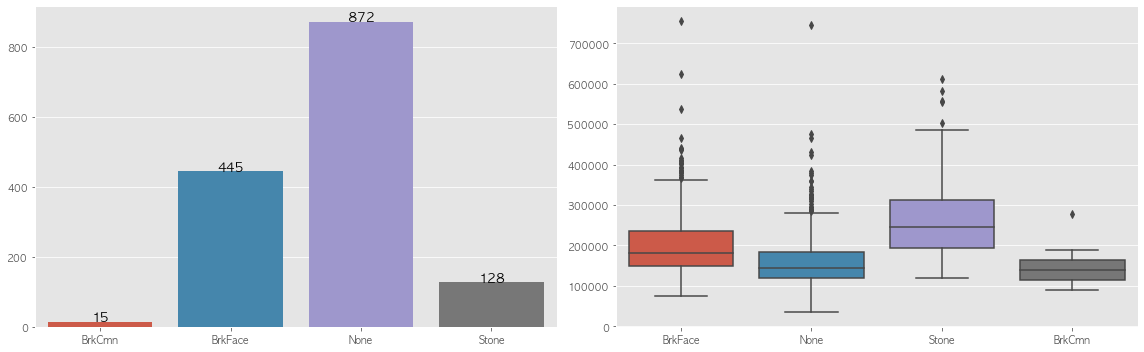

In [123]:
nor_compare_plot(x = 'MasVnrType', y = 'SalePrice', data = final_data)

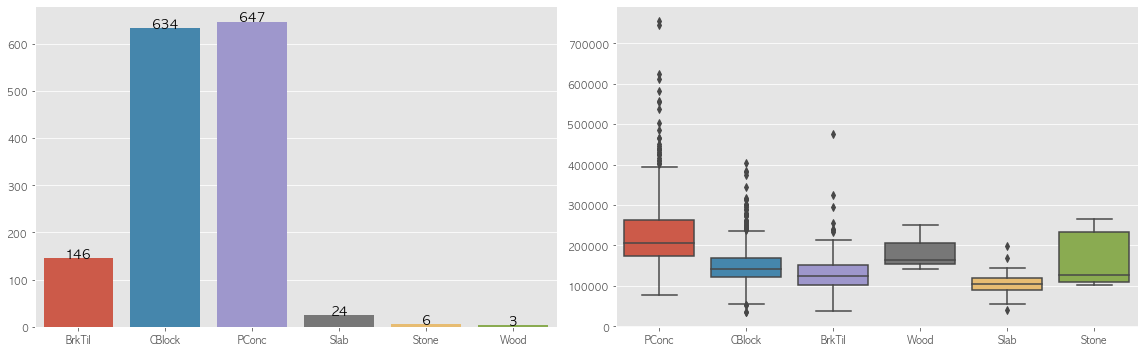

In [125]:
nor_compare_plot(x = 'Foundation', y = 'SalePrice', data = final_data)

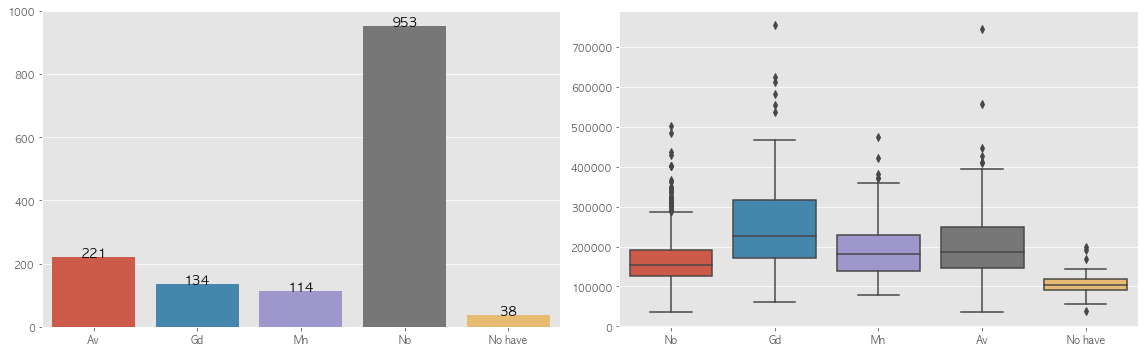

In [126]:
nor_compare_plot(x = 'BsmtExposure', y = 'SalePrice', data = final_data)

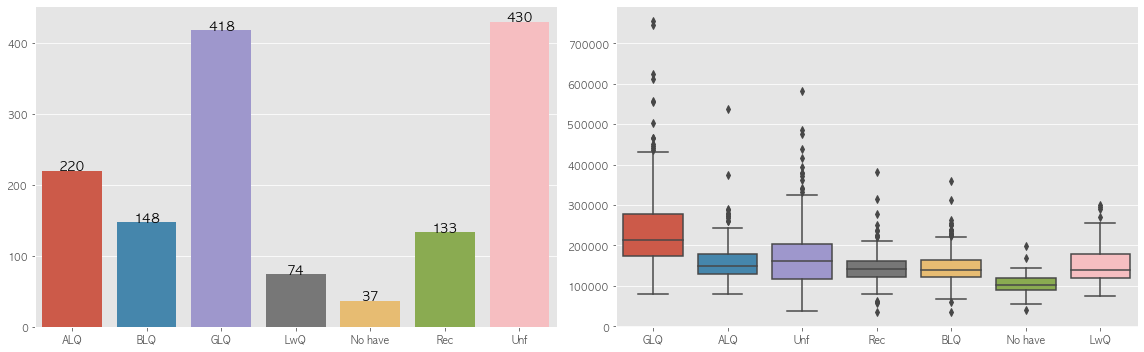

In [127]:
nor_compare_plot(x = 'BsmtFinType1', y = 'SalePrice', data = final_data)

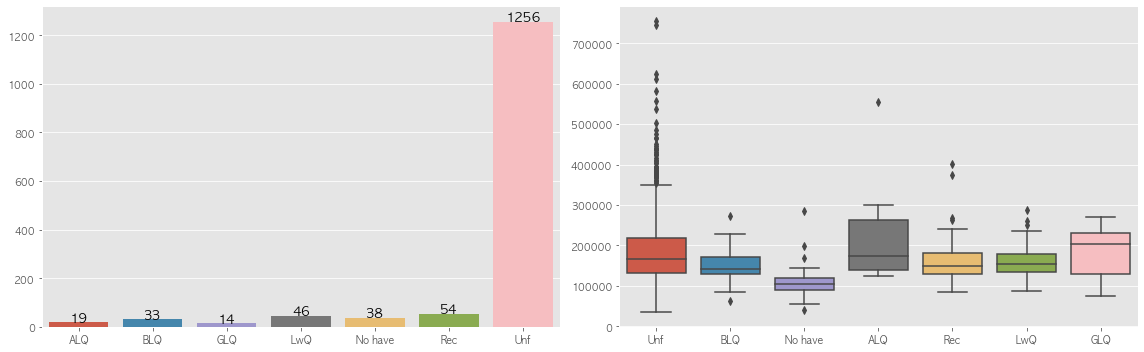

In [128]:
nor_compare_plot(x = 'BsmtFinType2', y = 'SalePrice', data = final_data)

<AxesSubplot:xlabel='Exterior1st', ylabel='SalePrice'>

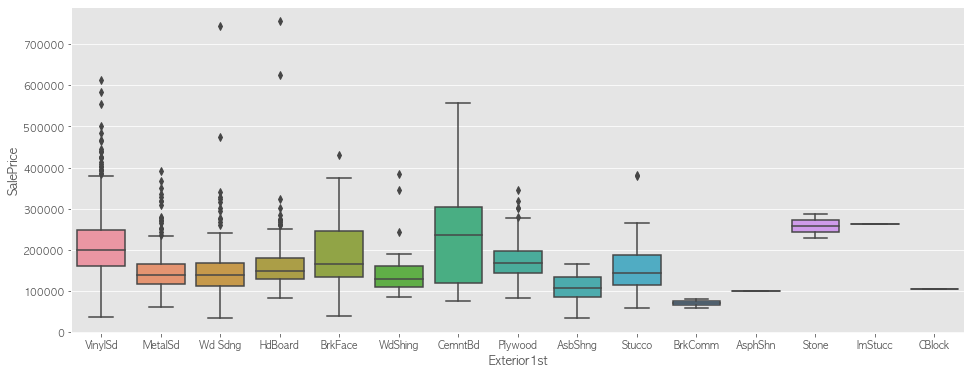

In [120]:
plt.figure(figsize = (16, 6))

sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = final_data)

In [130]:
from pycaret.regression import *

In [133]:
reg = setup(data = modify_data, target = 'SalePrice')

,Description,Value
0,session_id,4614
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 397)"


In [134]:
# Lasso,

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,16685.0259,777968655.6307,26503.9387,0.8754,0.1380,0.1004,0.1510
lightgbm,Light Gradient Boosting Machine,16886.5094,789740194.6791,27273.4745,0.8715,0.1426,0.1016,0.0530
rf,Random Forest Regressor,17804.5544,905513387.5077,29112.5384,0.8530,0.1537,0.1089,0.4410
ada,AdaBoost Regressor,23042.3890,1216828493.7416,34112.9788,0.8009,0.1957,0.1524,0.1020
ridge,Ridge Regression,19456.5646,1272588620.8000,33598.5672,0.7801,0.1904,0.1175,0.0180
et,Extra Trees Regressor,21649.4961,1445045677.3498,37157.9917,0.7570,0.1828,0.1277,0.4740
omp,Orthogonal Matching Pursuit,18262.2963,1459662140.7906,34901.6565,0.7552,0.1709,0.1101,0.0250
lasso,Lasso Regression,20849.5531,1580157120.0000,37556.6709,0.7334,0.2405,0.1293,0.0550
en,Elastic Net,20806.6814,1568282012.8000,36765.6398,0.7275,0.1659,0.1228,0.0590
dt,Decision Tree Regressor,26602.0972,1758766156.3676,41088.6849,0.7077,0.2222,0.1606,0.0260


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=4614, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

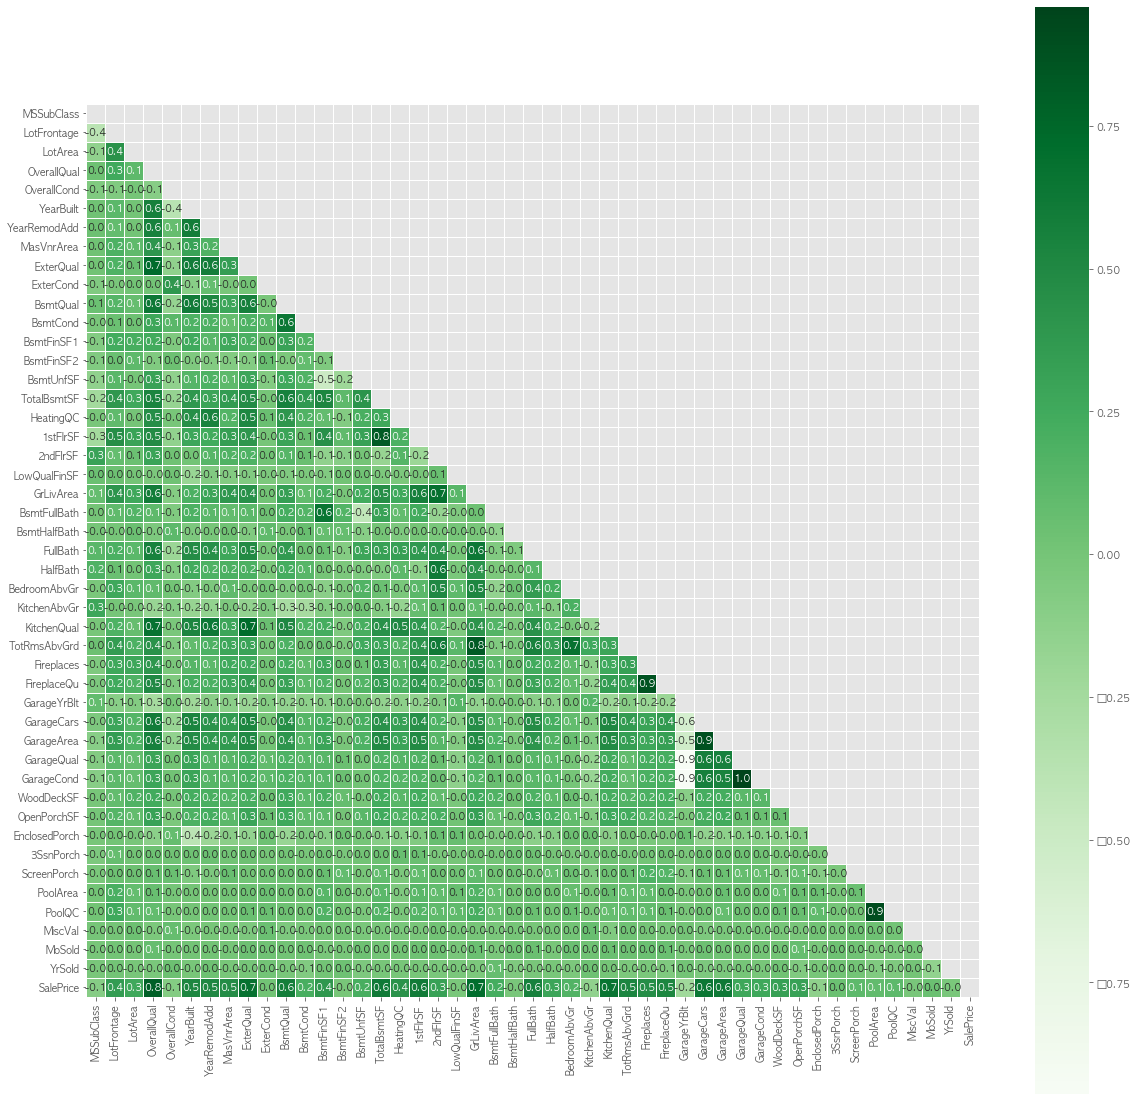

In [46]:
# 수치형 변수의 히트맵 시각화
cor_data = final_data.drop('Id', axis = 1).corr()

# 히트맵의 'mask' 옵션 설정
mask = np.zeros_like(cor_data, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# 시각화 수행
plt.figure(figsize = (20, 20))

sns.heatmap(cor_data, linewidths = 0.5, mask = mask, square = True, 
            annot = True, fmt = '.1f', cmap = 'Greens')
plt.show()